<img align="right" src="../img/DEP.png" width="400px">

# Regression on Open EU Gender Equality Index data (with Python)

Contributor: Wu, Ze Wen (https://github.com/zewenwu)

In this notebook, we will explore some of the basic capabilities of Python's **scikit-learn** package for the data science's role to work with regression datasets. For numerical analysis of tabular data, we shall use the Pandas package, which includes specific data types and functions for working with two-dimensional tables of data in Python. The Pandas package offers a more convenient structure to work with data - the DataFrame.

*Supervised* machine learning techniques involve in training a machine learning model that utilizes a set of *features* to predict a *label* using a dataset that includes already-known label values. This can be mathematically formulated as 
$$y = f([x_1, x_2, x_3, ...]),$$
where $f$ represents a function that maps the features to the label. 

*Regression* is a form of supervised machine learning in which you train a model to use the features (the ***x*** = $[x_1, x_2, x_3, ...]$ values in our function) to predict a label (*y*) of numerical values. For example, *y* represent 
- The COVID-19 cases that you want to forecast for the upcoming weeks
- Your favorite stock index you want to predict for the upcoming months
- The price of a car, based on some of its characteristics.

In this notebook lab, we'll focus an example based on the Open EU Gender Equality Index data, taken from the [EU Open Data Portal](https://data.europa.eu/euodp/en/data/dataset/gender-equality-index). The Gender Equality Index is a composite indicator that measures the complex concept of gender equality and, based on the EU policy framework, assists in monitoring progress of gender equality across the EU member states over time. The Gender Equality Index consists of eight domains. The six domains work, money, knowledge, time, power, health which are combined into a core Index that is complemented by two additional, equally important, satellite domains of violence and intersecting inequalities. They belong to the framework of the Gender Equality Index in all respects, but do not impact the overall score. Each domain is further divided into sub-domains which cover the key issues within the respective thematic areas. Using this framework, 31 indicators have been chosen to monitor developments in gender equality in the six core domains in every Member State as well as the EU-28 in total. The Gender Equality Index is formed by combining these indicators into a single summary measure, which allows for the complex issue of gender equality to be synthesised into one easy to understand measure.

More info can be found on [European Institute for Gender Equality](https://eige.europa.eu/gender-equality-index/2020/country/DE) , including some nice visualisation on the dataset.

Contents:
- Explore and preprocess data 
- Split data into training data and test data
- Train regression models using **scikit-learn** machine learning models
- Save your model and inference new cases.
- Appendix 1: Other file formats

What you will learn:
- Exploring and preprocessing data for training regression machine learning models.
- Explore the different off-the-shelf regression machine learning models of **scikit-learn**.
- Save the trained machine learning model and import it to make new predictions.

Remark:
- You have to run the code cells in sequence. Some code blocks may depend on variables from previous code blocks.
- If you are executing this tutorial on a local computer, please setup the Anaconda3 Python environment before executing the following Python codes. In the Big Data Test Infrastructure (BDTI), this Python environment will be set up for you. Furthermore, you can utilize the BDTI resources to do computational heavy calculations and data storage.

Source:
- [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics)
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Matplotlib documentation](https://matplotlib.org/3.3.2/contents.html)
- [User guide of Scikit-learn](https://scikit-learn.org/stable/user_guide.html) 

## Explore and preprocess data

Let's start by loading the Gender Equality Index data as a **Pandas** DataFrame and view it. The dataset is saved in the folder *online-data* in *csv-format*. This is a common data format where the information is delimited using a symbol such as **,** or **;**. 

To import this data as a Pandas DataFrame into the memory of Python, the **read_csv** method can be used from the Pandas package. In this method, you need to provide which **delimiter** that is used in the dataset and whether a **header** is present. The header can contain schema information about what the numbers of the data represents. More information on Pandas DataFrame can be found in the [Pandas documentation](https://pandas.pydata.org/docs/).


> **Remark**: To import data from other file formats, please look into Appendix 1.

In [1]:
import pandas as pd

# load the training dataset
gender_eq_data = pd.read_csv('../eu-open-data/gender-equality-index.csv', delimiter=';', decimal = ",", header='infer')
gender_eq_data.head()

Country  Gender Equality Index  WORK  Participation  \
0   EU-28                   66.2  71.5           79.8   
1      BE                   70.5  73.8           77.5   
2      BG                   58.0  68.6           82.7   
3      CZ                   53.6  66.1           81.8   
4      DK                   76.8  79.2           87.2   

   Segregation and quality of work  MONEY  Financial resources  \
0                             64.0   79.6                 73.0   
1                             70.2   87.5                 82.7   
2                             56.9   61.9                 48.2   
3                             53.5   75.9                 58.8   
4                             72.0   86.6                 82.4   

   Economic situation  KNOWLEDGE  Attainment and participation  ...  \
0                86.7       63.4                          72.1  ...   
1                92.6       71.1                          73.3  ...   
2                79.5       53.3                          56.1  ...   
3                98.1       57.3                          66.9  ...   
4                91.1       73.6                          82.1  ...   

   Population without unmet needs for medical examination (%) T  \
0                                               95.0              
1                                               97.1              
2                                               93.5              
3                                               95.4              
4                                               92.9              

   Population without unmet needs for dental examination (%) W  \
0                                               93.7             
1                                               94.5             
2                                               93.7             
3                                               97.3             
4                                               94.8             

   Population without unmet needs for dental examination (%) M  \
0                                               94.0             
1                                               94.7             
2                                               93.9             
3                                               97.1             
4                                               92.5             

   Population without unmet needs for dental examination (%) T  \
0                                               93.9             
1                                               94.6             
2                                               93.8             
3                                               97.2             
4                                               93.7             

   Population (number) W  Population (number) M  Population (number) T  \
0            213.784.337            199.340.866            413.125.203   
1              4.597.186              4.359.690              8.956.876   
2              3.124.248              2.892.703              6.016.950   
3              4.447.546              4.214.360              8.661.907   
4              2.279.774              2.213.367              4.493.141   

   Population (%) W  Population (%) M  Population (%) T  
0             51,7%             48,3%            100,0%  
1             51,3%             48,7%            100,0%  
2             51,9%             48,1%            100,0%  
3             51,3%             48,7%            100,0%  
4             50,7%             49,3%            100,0%  

[5 rows x 122 columns]

We observe the six domains of WORK, MONEY, KNOWLEDGE, TIME, POWER and HEALTH that determine gender equality for the 27 European countries (as of 2015).
In this dataset, we shall take the scenario that **Gender Equality Index** represents the label (the *y* value) of our model. It is the variable that must be trained to predict.

The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the *features* and the *label* your model will try to predict. This may require some work 
- to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values), 
- deriving new feature columns by transforming or combining existing features (a process known as *feature engineering*), 
- *normalizing* numeric features (values you can measure or count) so they're on a similar scale, 
- and *encoding* categorical features (values that represent discrete categories) as numeric indicators.

we shall remove the first row, corresponding to the of Gender Equality over all of Europe. Finally, we shall take the six domains described as potential features (*x* values). These are located at columns 3, 6, 9, 12, 15 and 19.


In [2]:
columns = [0, 1, 2, 5, 8, 11, 14, 18]
# Select the relevant columns
gender_eq_data2 = gender_eq_data.iloc[:, columns]

# Remove the first row
gender_eq_data2 = gender_eq_data2.iloc[1::]

# Display the result
gender_eq_data2.head()

Country  Gender Equality Index  WORK  MONEY  KNOWLEDGE  TIME  POWER  HEALTH
1      BE                   70.5  73.8   87.5       71.1  65.3   53.4    86.3
2      BG                   58.0  68.6   61.9       53.3  42.7   56.0    76.4
3      CZ                   53.6  66.1   75.9       57.3  57.3   22.6    86.0
4      DK                   76.8  79.2   86.6       73.6  83.1   61.5    89.6
5      DE                   65.5  71.4   84.2       52.9  65.0   53.0    90.5

OK, let us start our analysis of the data by examining a few key descriptive statistics. We can use the DataFrame's **describe** method to generate these for the numeric features as well as the **Gender Equality Index** label column.

In [3]:
gender_eq_data2.describe()

Gender Equality Index       WORK      MONEY  KNOWLEDGE       TIME  \
count              28.000000  28.000000  28.000000  28.000000  28.000000   
mean               62.703571  71.614286  77.582143  60.525000  62.710714   
std                 8.923107   4.586511   9.161233   7.334829  12.708829   
min                50.000000  62.400000  59.400000  48.900000  42.700000   
25%                55.775000  68.250000  70.700000  54.950000  51.225000   
50%                61.100000  72.050000  78.900000  59.250000  64.100000   
75%                69.750000  73.925000  85.950000  66.175000  70.650000   
max                82.600000  82.600000  94.400000  73.600000  90.100000   

          POWER     HEALTH  
count  28.00000  28.000000  
mean   43.05000  86.089286  
std    16.27576   5.422200  
min    18.70000  70.400000  
25%    28.42500  83.250000  
50%    41.25000  86.700000  
75%    54.05000  89.750000  
max    79.50000  94.100000

The statistics reveal some information about the distribution of the data in each of the numeric fields, including the number of observations, the mean, standard deviation, minimum and maximum values, and the quartile values (the threshold values for 25%, 50% - which is also the median, and 75% of the data).

We might get a clearer idea of the distribution of the Gender Equality Index values by visualizing the data. Common plot types for visualizing numeric data distributions are *histograms* and *box plots*, so let's use Python's **matplotlib** library to create one of each of these for the **rentals** column.

<ipython-input-4-b3fc01708b36>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


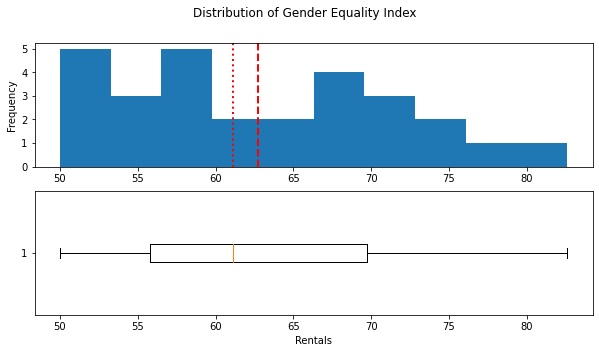

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = gender_eq_data2['Gender Equality Index']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (10,5))

# Plot the histogram   
ax[0].hist(label)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='red', linestyle='dotted', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Distribution of Gender Equality Index')

# Show the figure
fig.show()

The plots show that the Gender Equality Index of the European states ranges from 50 to approximately 83.

We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.

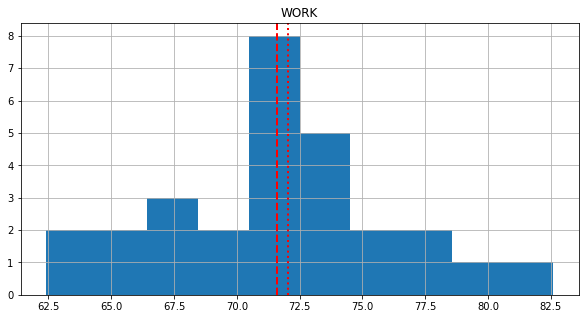

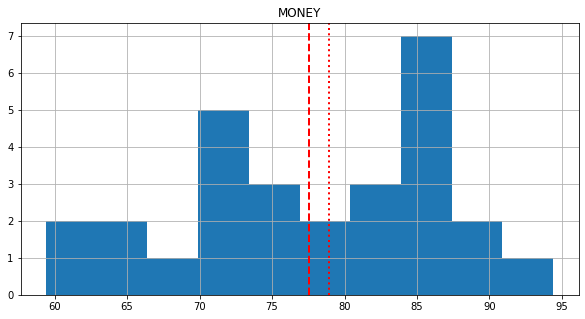

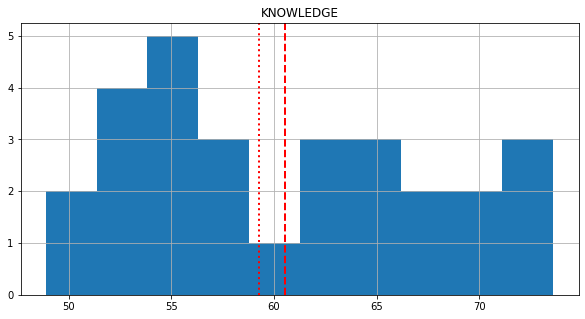

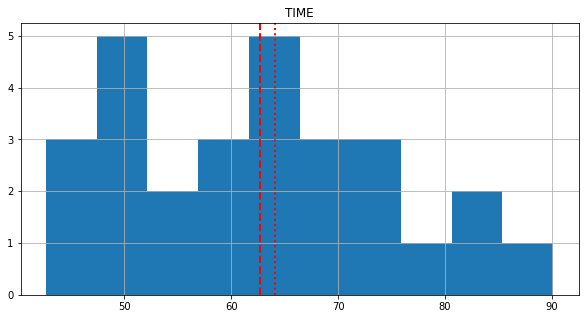

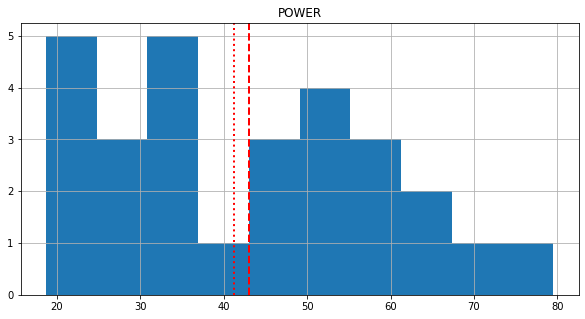

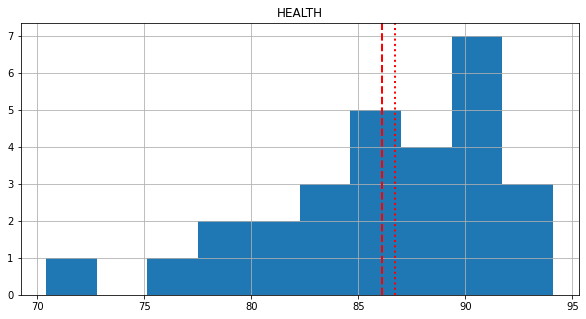

In [5]:
# Plot a histogram for each numeric feature
numeric_features = ["WORK", "MONEY", "KNOWLEDGE", "TIME", "POWER", "HEALTH"]
for col in numeric_features:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    feature = gender_eq_data2[col]
    feature.hist(ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='red', linestyle='dotted', linewidth=2)
    ax.set_title(col)
plt.show()

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the **Gender Equality Index** label we want to be able to predict. For the numeric features, we can create scatter plots that show the intersection of feature and label values. Also, we can calculate the *correlation* statistic to quantify the apparent relationship, which we plot in the title.

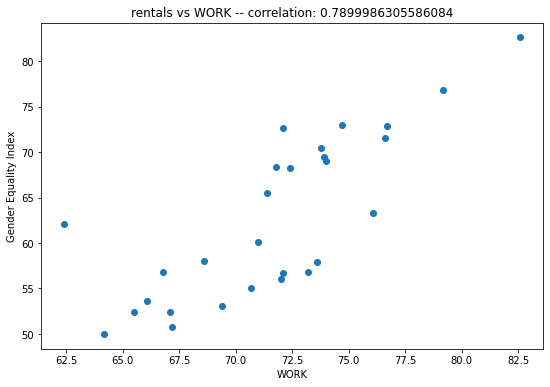

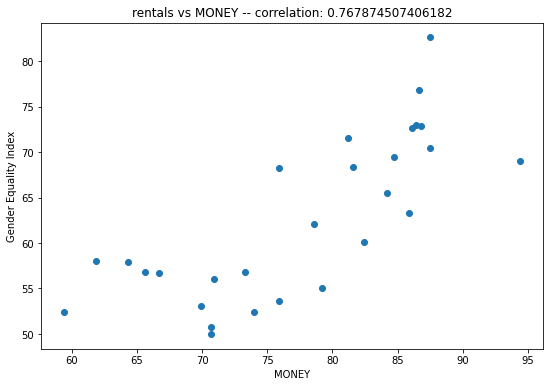

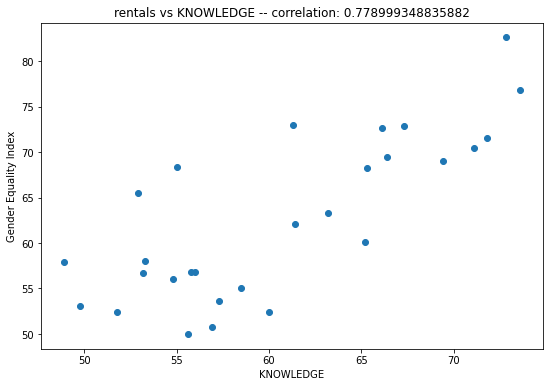

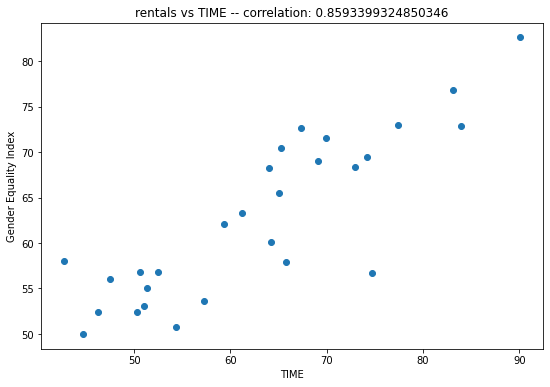

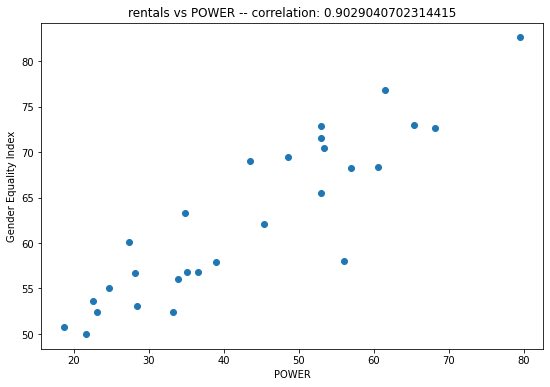

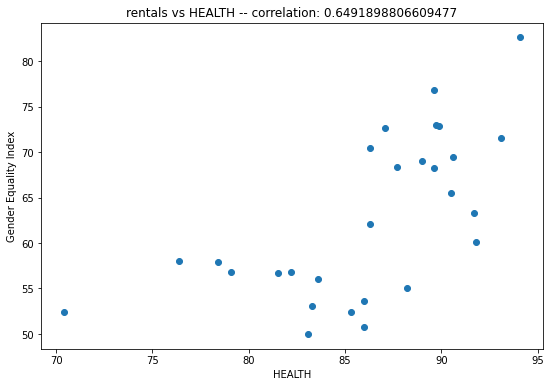

In [6]:
# Define the label
label = gender_eq_data2['Gender Equality Index']

# For each feature, plot a scatter plot and calculate correlation with the label.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = gender_eq_data2[col]
    c = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Gender Equality Index')
    ax.set_title('rentals vs ' + col + ' -- correlation: ' + str(c))
plt.show()

The results are not conclusive, but all of the numerical features seem to correlate positively to the *Gender Equality Index*.

Furthermore, from the scatter plots for *WORK*, *MONEY* and *KNOWLEDGE*, you can see that they approximately contribute equally to the *Gender Equality Index* (correlation of approx. 0.77). *POWER* seem to correlate the strongest (correlation of approx. 0.9) and *HEALTH* the least (correlation of approx. 0.65).

> **Remark**: While not relevant here, features can also be *categorical* instead of *numerical* as in this case. This means that instead of numbers, features take certain categories as values(e.g. sunny-windy-snowy, man-woman or red-blue-green). For this case, it is best to plot the histogram and boxplot of the label for each category. More info on regression examples can be found in the [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics).

## Split data into training data and test data

Now that we've explored the data, it's time to prepare it to train a regression model that uses the features we've identified as potentially predictive to predict the **Gender Equality Index** label. The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict.

In [7]:
# Separate features and labels
X, y = gender_eq_data2[['WORK', 'MONEY', 'KNOWLEDGE', 'TIME', 'POWER', 'HEALTH']].values, gender_eq_data2['Gender Equality Index'].values

# Checking correctness
print('Features:',X[:5], '\nLabels:', y[:5], sep='\n')
gender_eq_data2.head(5)

Features:
[[73.8 87.5 71.1 65.3 53.4 86.3]
 [68.6 61.9 53.3 42.7 56.  76.4]
 [66.1 75.9 57.3 57.3 22.6 86. ]
 [79.2 86.6 73.6 83.1 61.5 89.6]
 [71.4 84.2 52.9 65.  53.  90.5]]

Labels:
[70.5 58.  53.6 76.8 65.5]


Country  Gender Equality Index  WORK  MONEY  KNOWLEDGE  TIME  POWER  HEALTH
1      BE                   70.5  73.8   87.5       71.1  65.3   53.4    86.3
2      BG                   58.0  68.6   61.9       53.3  42.7   56.0    76.4
3      CZ                   53.6  66.1   75.9       57.3  57.3   22.6    86.0
4      DK                   76.8  79.2   86.6       73.6  83.1   61.5    89.6
5      DE                   65.5  71.4   84.2       52.9  65.0   53.0    90.5

After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.

We *could* train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets:
- a (typically larger) set with which to train the model, 
- and a smaller "hold-back" set with which to validate the trained model. 

This enables us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels. It's important to split the data *randomly* (rather than say, taking the first 70% of the data for training and keeping the rest for validation). This helps ensure that the two subsets of data are statistically comparable (so we validate the model with data that has a similar statistical distibution to the data on which it was trained).

To randomly split the data, we'll use the **train_test_split** function in the **scikit-learn** library. This library is one of the most widely used machine learning packages for Python.

In [8]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 22 rows
Test Set: 6 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

## Train regression models using **scikit-learn** machine learning models

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. We'll use the a *linear regression* algorithm, a common starting point for regression that works by trying to find a linear relationship between the *X* values and the *y* label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In **scikit-learn**, training algorithms are encapsulated in *estimators*, and in this case we'll use the **LinearRegression** estimator to train a linear regression model. The labels *y* can be *fitted* using the features *X*. This can be done using the **fit** method of the untrained model.

In [9]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model_lin = LinearRegression().fit(X_train, y_train)
print (model_lin)

LinearRegression()


Now that we've trained the model, we can use it to predict the Gender Equality Index for the features we held back in our validation dataset. Then we can compare these predictions to the actual label values to evaluate how well the model is working.

In [10]:
import numpy as np

predictions = model_lin.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions, 1))
print('Actual labels   : ', y_test)

Predicted labels:  [54.  52.  56.5 60.3 57.  60.9]
Actual labels   :  [53.6 52.4 56.8 60.1 56.7 62.1]


## Regression metrics

We could compare each label value that was predicted with the actual label value, but that would be time consuming and not a good way to quantify the performance of the trained model. Several machine learning model metrics for regression to quantify the performance are:
- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

For more info, you can consult the [User guide of Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Additionally, we could visualize the performance of the trained model using a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

Let us use **scikit-learn** to calculate these metrics for our model, based on the predictions it generated for the validation data. Also, we put these metrics in a metrics table.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

metrics = pd.DataFrame(index = ["MSE", "RMSE", "R2"], columns = ["LinearRegression"])
metrics.iloc[0,0] = mean_squared_error(y_test, predictions)
metrics.iloc[1,0] = np.sqrt(metrics.iloc[0,0])
metrics.iloc[2,0] = r2_score(y_test, predictions)

metrics

LinearRegression
MSE          0.331996
RMSE         0.576191
R2           0.970901

Additionally, we will visualize the performance as mentioned above

In [12]:
y_test

array([53.6, 52.4, 56.8, 60.1, 56.7, 62.1])

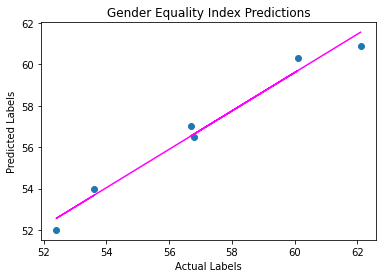

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gender Equality Index Predictions')

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's an amount of difference between the ideal function represented by the line and the results. This variance represents the *residuals* of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of *error* when the model is used with new data for which the label is unknown.

## Try other regression models

The linear regression algorithm we used to train the model has predictive capability, but there are many kinds of regression algorithm we could try, including:

- **Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an *Ordinary Least Squares* algorithm), but other variants such as *Lasso* and *Ridge*.
- **Multivariate polynomial models**: You could assume that the relationship between the features and the label is of polynomial nature. You would choose which terms of the polynomial (up to which degree and/or including interacting terms) should be included in the model. 
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction.
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

> **Remark**: For a full list of Scikit-Learn estimators that encapsulate algorithms for supervised machine learning, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/supervised_learning.html). There are many algorithms to choose from, but for most real-world scenarios, the [Scikit-Learn estimator cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) can help you find a suitable starting point.

Let's try training our regression model by using a **Lasso** algorithm. We can do this by just changing the estimator in the training code.

In [14]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gender Equality Index Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
m = pd.Series([mse, np.sqrt(mse), r2])
m.index = ["MSE", "RMSE", "R2"]
metrics = pd.concat([metrics, m.rename("Lasso")], axis=1)
metrics

Lasso() 



LinearRegression     Lasso
MSE          0.331996  0.461720
RMSE         0.576191  0.679500
R2           0.970901  0.959531

For a multivatiate polynomial model, a more manual process is necessary to construct the model. You can include all the possible combinations of the feature columns up to degree **d** in the model and then apply a Ridge regresion (linear least squares with L2 regularization). In the Ridge regression, we minimizing the cost function:

$$L = ||y - X*w||^2_2 + \alpha ||w||^2_2,$$

where $y$ contains the labels, $w$ the model parameters of the multivariate polynomial model to determine, $\alpha$ the hyperparameter to indicate the importance of the regularization term against the least squares term, and $X$ the feature matrix consisting of all polynomial combinations of the features up to a given degree. For example, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

> **Remark:** Be careful when choosing a high degree d, as the number of additional features/inputs of the model increases exponentially with d (see Curse of Dimensionality). This means that you will be spending way more time training the model if you increase d just slightly to improve the complexity of the model.

To construct X, we use the **PolynomialFeature** method of Scikit-Learn and choose degree **d=2**. To execute the Ridge regression, we use the **Ridge** method of Scikit-Learn.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Trainsforming our feature matrix X_train and X_test into new feature matrices by including the polynomial combinations.
d = 2
poly = PolynomialFeatures(d)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

Ridge(alpha=2.0) 



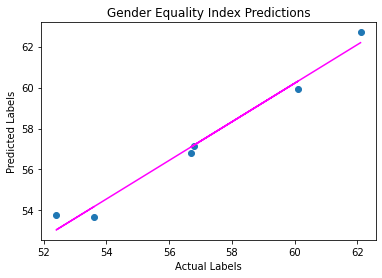

LinearRegression     Lasso  MultivariatePolynomial
MSE          0.331996  0.461720                0.394754
RMSE         0.576191  0.679500                0.628295
R2           0.970901  0.959531                0.965400

In [16]:
from sklearn.linear_model import Ridge

# Fit the multivariate polynomial model on the training set using Ridge regression.
a = 2.0
model = Ridge(alpha=a)
model.fit(X_train_poly, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test_poly)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gender Equality Index Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# # Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
m = pd.Series([mse, np.sqrt(mse), r2])
m.index = ["MSE", "RMSE", "R2"]
metrics = pd.concat([metrics, m.rename("MultivariatePolynomial")], axis=1)
metrics

There's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a *branch* in a *decision tree* based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

It's easiest to see how this works with an example. Let us train a Decision Tree regression model using the Gender Equality Index data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_3 <= 57.75
|   |--- feature_4 <= 23.90
|   |   |--- feature_4 <= 22.40
|   |   |   |--- feature_0 <= 65.70
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  65.70
|   |   |   |   |--- value: [50.80]
|   |   |--- feature_4 >  22.40
|   |   |   |--- value: [52.40]
|   |--- feature_4 >  23.90
|   |   |--- feature_4 <= 31.20
|   |   |   |--- feature_5 <= 85.75
|   |   |   |   |--- value: [53.10]
|   |   |   |--- feature_5 >  85.75
|   |   |   |   |--- value: [55.10]
|   |   |--- feature_4 >  31.20
|   |   |   |--- feature_3 <= 45.10
|   |   |   |   |--- value: [58.00]
|   |   |   |--- feature_3 >  45.10
|   |   |   |   |--- feature_0 <= 69.40
|   |   |   |   |   |--- value: [56.80]
|   |   |   |   |--- feature_0 >  69.40
|   |   |   |   |   |--- value: [56.00]
|--- feature_3 >  57.75
|   |--- feature_3 <= 75.80
|   |   |--- feature_4 <= 41.25
|   |   |   |--- feature_2 <= 56.05
|   |   |   |   |--- value: [57.90]
|   |   |   |--- featu

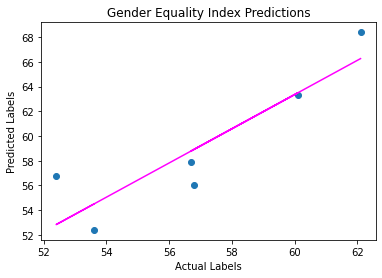

LinearRegression     Lasso  MultivariatePolynomial  DecisionTreeRegressor
MSE          0.331996  0.461720                0.394754              12.135000
RMSE         0.576191  0.679500                0.628295               3.483533
R2           0.970901  0.959531                0.965400              -0.063618

In [18]:
# calculate predictions
predictions = model.predict(X_test)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gender Equality Index Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
m = pd.Series([mse, np.sqrt(mse), r2])
m.index = ["MSE", "RMSE", "R2"]
metrics = pd.concat([metrics, m.rename("DecisionTreeRegressor")], axis=1)
metrics

The tree-based model doesn't seem to have improved over the linear model, so what else could we try?

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by appying an aggregate function to a collection of base models (sometimes referred to a *bagging*) or by building a sequence of models that build on one another to improve predictive performance (referred to as *boosting*).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

RandomForestRegressor() 



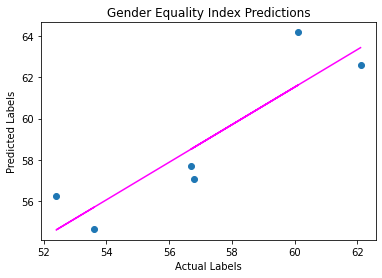

LinearRegression     Lasso  MultivariatePolynomial  \
MSE          0.331996  0.461720                0.394754   
RMSE         0.576191  0.679500                0.628295   
R2           0.970901  0.959531                0.965400   

      DecisionTreeRegressor  RandomForestRegressor  
MSE               12.135000               5.676680  
RMSE               3.483533               2.382579  
R2                -0.063618               0.502446

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Calculate predictions using test data
predictions = model.predict(X_test)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gender Equality Index Predictions')

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
m = pd.Series([mse, np.sqrt(mse), r2])
m.index = ["MSE", "RMSE", "R2"]
metrics = pd.concat([metrics, m.rename("RandomForestRegressor")], axis=1)
metrics

For good measure, let's also try a *boosting* ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the *loss* (error) in the model.

GradientBoostingRegressor() 



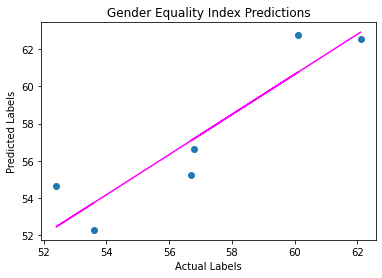

LinearRegression     Lasso  MultivariatePolynomial  \
MSE          0.331996  0.461720                0.394754   
RMSE         0.576191  0.679500                0.628295   
R2           0.970901  0.959531                0.965400   

      DecisionTreeRegressor  RandomForestRegressor  GradientBoostingRegressor  
MSE               12.135000               5.676680                   2.696135  
RMSE               3.483533               2.382579                   1.641991  
R2                -0.063618               0.502446                   0.763687

In [20]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Calculate predictions using test data
predictions = model.predict(X_test)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gender Equality Index Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
m = pd.Series([mse, np.sqrt(mse), r2])
m.index = ["MSE", "RMSE", "R2"]
metrics = pd.concat([metrics, m.rename("GradientBoostingRegressor")], axis=1)
metrics

We've now seen a number of common techniques used to train predictive models for regression. In a real project, you'd likely try a few more algorithms, hyperparameters, and preprocessing transformations; but by now you should have got the general idea. Let's explore how you can use the trained model with new data.

## Save your model and inference new cases
We have tried several machine learning models for our regression dataset.
Let us save the best model, the linear model, as a local file.

This can be done like this,

In [21]:
import joblib

# Save the model as a pickle file
filename = '../models/gender_eq_model.pkl'
joblib.dump(model_lin, filename)

print("Model saved!")

Model saved!


Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*.

The scenario might be that a new fictional country is trying to enter the EU, 
but the EU has a condition that the Gender Equality Index of that country needs to be at least the smallest Gender Equality Index of a member state in the current member states. 

Not knowing how the Gender Equality Index is calculated, but having data on WORK, MONEY, KNOWLEDGE, TIME, POWER and HEALTH index, the candidate country can try to predict its Gender Equality Index using a machine learning model whether this EU condition will be satisfied.

In [22]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing the data on WORK, MONEY, KNOWLEDGE, TIME, POWER and HEALTH of the new fictional country.
X_new = np.array([[73.8, 67.5, 61.1, 35.3, 56.4, 86.3]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict Gender Equality Index
result = loaded_model.predict(X_new)
print('Prediction Gender Equality Index: {:.0f} \n'.format(np.round(result[0])))

# Check if EU condition is satisfied
EU_INDEX_STANDARD = gender_eq_data2["Gender Equality Index"].min()
if result >= EU_INDEX_STANDARD:
    print("Congratulation! You may enter the EU.")
else:
    print("Sorry! You may NOT enter the EU.")

New sample: [73.8, 67.5, 61.1, 35.3, 56.4, 86.3]
Prediction Gender Equality Index: 61 

Congratulation! You may enter the EU.


## Further Readings

Sources: 
- To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html).
- To learn more about machine learning basics on other datasets, see the [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics).

## Appendix 1: Other file formats

In the above tutorial, only csv-files are considered. However, the Pandas DataFrame can also import other file formats. In this appendix, we shall give a short description on how to import other file formats, such as *JSON-format* and *XML-format*.

Let us import some example data,

In [23]:
import pandas as pd

### Method for importing JSON-files.

# Use the built-in method for reading JSON-files
color_data = pd.read_json('../example-data/color.json')
color_data

color value
0      red  #f00
1    green  #0f0
2     blue  #00f
3     cyan  #0ff
4  magenta  #f0f
5   yellow  #ff0
6    black  #000

In [24]:
import pandas as pd
import xml.etree.ElementTree as et

### Method for importing XML-files.

# Define an XML parser for reading XML-files
def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

# Use the defined function.
student_data = parse_XML("../example-data/student.xml", ["name", "email", "grade", "age"])
student_data

name            email grade age
0    John    john@mail.com     A  16
1   Alice   alice@mail.com     B  17
2     Bob     bob@mail.com     C  16
3  Hannah  hannah@mail.com     A  17

However, the downside to this last approach is that you need to know the structure of the XML file in advance. Source: [From XML to Pandas dataframes](https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c).